In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [328]:
missing_values=["?"]
title=['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df=pd.read_csv('breast-cancer.csv',names=title,na_values=missing_values)
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [329]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [330]:
print(df['menopause'].unique())
print(df['Class'].unique())
print(df['node-caps'].unique())
print(df['breast-quad'].unique())
print(df['breast'].unique())
print(df['deg-malig'].unique())

['premeno' 'ge40' 'lt40']
['no-recurrence-events' 'recurrence-events']
['no' 'yes' nan]
['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]
['left' 'right']
[3 2 1]


In [331]:
ks=str(df['breast-quad'].mode())
print(ks)
ks=ks.split(" ")
ks=ks[-2].split('\n')
print(ks[0])
df['breast-quad'].fillna(ks[0],inplace=True)
sk=str(df['node-caps'].mode())
sk=sk.split(" ")
print(sk)
sk=sk[-2].split('\n')
print(sk[0])
df['node-caps'].fillna(sk[0],inplace=True)

0    left_low
dtype: object
left_low
['0', '', '', '', 'no\ndtype:', 'object']
no


In [332]:
df.columns

Index(['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [333]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [334]:
print(df['menopause'].unique())
print(df['Class'].unique())
print(df['node-caps'].unique())
print(df['breast-quad'].unique())
print(df['breast'].unique())
print(df['deg-malig'].unique())

['premeno' 'ge40' 'lt40']
['no-recurrence-events' 'recurrence-events']
['no' 'yes']
['left_low' 'right_up' 'left_up' 'right_low' 'central']
['left' 'right']
[3 2 1]


In [335]:
l=[]
age_start=[]
age_end=[]
for i in df['age']:
    l=i.split('-')
    age_start.append(l[0])
    age_end.append(l[1])
df['age_start']=age_start
df['age_end']=age_end

In [336]:
l=[]
tumor_min=[]
tumor_max=[]
for i in df['tumor-size']:
    l=i.split('-')
    tumor_min.append(l[0])
    tumor_max.append(l[1])
df['tumor_max']=tumor_max
df['tumor_min']=tumor_min
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,age_start,age_end,tumor_max,tumor_min
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no,30,39,34,30
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no,40,49,24,20
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no,40,49,24,20
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no,60,69,19,15
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no,40,49,4,0


In [337]:
df.drop('age',inplace=True,axis=1)
df.drop('tumor-size',inplace=True,axis=1)

In [338]:
df.head()

,Class,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,age_start,age_end,tumor_max,tumor_min
0,no-recurrence-events,premeno,0-2,no,3,left,left_low,no,30,39,34,30
1,no-recurrence-events,premeno,0-2,no,2,right,right_up,no,40,49,24,20
2,no-recurrence-events,premeno,0-2,no,2,left,left_low,no,40,49,24,20
3,no-recurrence-events,ge40,0-2,no,2,right,left_up,no,60,69,19,15
4,no-recurrence-events,premeno,0-2,no,2,right,right_low,no,40,49,4,0


In [339]:
df.columns

Index(['Class', 'menopause', 'inv-nodes', 'node-caps', 'deg-malig', 'breast',
       'breast-quad', 'irradiat', 'age_start', 'age_end', 'tumor_max',
       'tumor_min'],
      dtype='object')

In [340]:
l=[]
invnodes_min=[]
invnodes_max=[]
for i in df['inv-nodes']:
    l=i.split('-')
    invnodes_min.append(l[0])
    invnodes_max.append(l[1])
df['invnodes_max']=invnodes_max
df['invnodes_min']=invnodes_min
df.head()

,Class,menopause,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,age_start,age_end,tumor_max,tumor_min,invnodes_max,invnodes_min
0,no-recurrence-events,premeno,0-2,no,3,left,left_low,no,30,39,34,30,2,0
1,no-recurrence-events,premeno,0-2,no,2,right,right_up,no,40,49,24,20,2,0
2,no-recurrence-events,premeno,0-2,no,2,left,left_low,no,40,49,24,20,2,0
3,no-recurrence-events,ge40,0-2,no,2,right,left_up,no,60,69,19,15,2,0
4,no-recurrence-events,premeno,0-2,no,2,right,right_low,no,40,49,4,0,2,0


In [341]:
df.drop('inv-nodes',inplace=True,axis=1)

In [342]:
df.columns

Index(['Class', 'menopause', 'node-caps', 'deg-malig', 'breast', 'breast-quad',
       'irradiat', 'age_start', 'age_end', 'tumor_max', 'tumor_min',
       'invnodes_max', 'invnodes_min'],
      dtype='object')

In [343]:
dats=df[['Class', 'menopause', 'age_start', 'age_end', 'tumor_min',
       'tumor_max','invnodes_min', 'invnodes_max','node-caps', 'deg-malig', 'breast',
       'breast-quad', 'irradiat']]
dats.head()

,Class,menopause,age_start,age_end,tumor_min,tumor_max,invnodes_min,invnodes_max,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,premeno,30,39,30,34,0,2,no,3,left,left_low,no
1,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,right,right_up,no
2,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,left,left_low,no
3,no-recurrence-events,ge40,60,69,15,19,0,2,no,2,right,left_up,no
4,no-recurrence-events,premeno,40,49,0,4,0,2,no,2,right,right_low,no


In [344]:
print(dats['Class'].unique())
print(dats['menopause'].unique())
print(dats['breast'].unique())
print(dats['breast-quad'].unique())
print(dats['irradiat'].unique())
print(dats['node-caps'].unique())

['no-recurrence-events' 'recurrence-events']
['premeno' 'ge40' 'lt40']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central']
['no' 'yes']
['no' 'yes']


In [345]:
dats.isnull().sum()

Class           0
menopause       0
age_start       0
age_end         0
tumor_min       0
tumor_max       0
invnodes_min    0
invnodes_max    0
node-caps       0
deg-malig       0
breast          0
breast-quad     0
irradiat        0
dtype: int64

In [346]:
dats.select_dtypes(['object']).columns

Index(['Class', 'menopause', 'age_start', 'age_end', 'tumor_min', 'tumor_max',
       'invnodes_min', 'invnodes_max', 'node-caps', 'breast', 'breast-quad',
       'irradiat'],
      dtype='object')

In [347]:
categorical=['Class','menopause','breast','breast-quad','node-caps','irradiat']
#dats['breast-quad'].unique()

In [348]:
dats.head()

,Class,menopause,age_start,age_end,tumor_min,tumor_max,invnodes_min,invnodes_max,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,premeno,30,39,30,34,0,2,no,3,left,left_low,no
1,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,right,right_up,no
2,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,left,left_low,no
3,no-recurrence-events,ge40,60,69,15,19,0,2,no,2,right,left_up,no
4,no-recurrence-events,premeno,40,49,0,4,0,2,no,2,right,right_low,no


C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='breast', ylabel='count'>

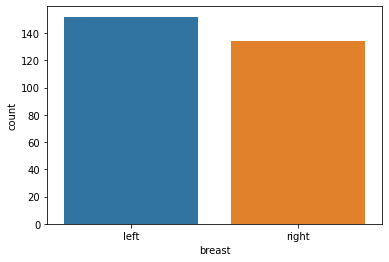

In [349]:
sns.countplot(dats['breast'])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

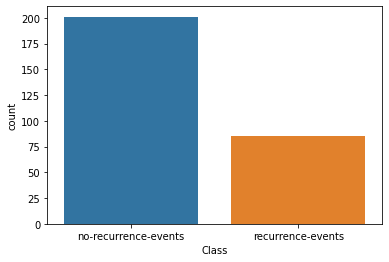

In [350]:
sns.countplot(dats[categorical[0]])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='menopause', ylabel='count'>

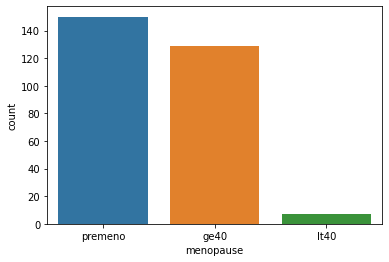

In [351]:
sns.countplot(dats[categorical[1]])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='breast', ylabel='count'>

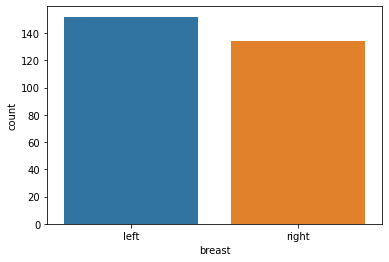

In [352]:
sns.countplot(dats[categorical[2]])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='breast-quad', ylabel='count'>

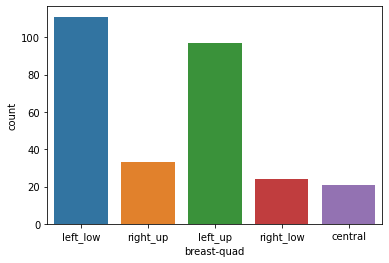

In [353]:
sns.countplot(dats[categorical[3]])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='node-caps', ylabel='count'>

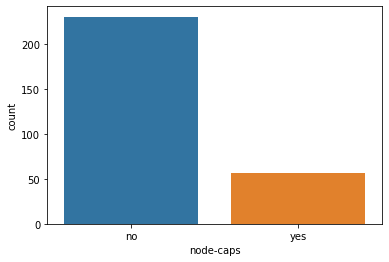

In [354]:
sns.countplot(dats[categorical[4]])

The above graph tells us about the imbalance of the output yes or no class

In [355]:
arr = []
for i in dats['invnodes_max']:
    arr.append(int(i))
dats['invnodes_max'] = arr
print(dats['invnodes_max'].dtype)
dats

int64


,Class,menopause,age_start,age_end,tumor_min,tumor_max,invnodes_min,invnodes_max,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,premeno,30,39,30,34,0,2,no,3,left,left_low,no
1,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,right,right_up,no
2,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,left,left_low,no
3,no-recurrence-events,ge40,60,69,15,19,0,2,no,2,right,left_up,no
4,no-recurrence-events,premeno,40,49,0,4,0,2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,premeno,30,39,30,34,0,2,no,2,left,left_up,no
282,recurrence-events,premeno,30,39,20,24,0,2,no,3,left,left_up,yes
283,recurrence-events,ge40,60,69,20,24,0,2,no,1,right,left_up,no
284,recurrence-events,ge40,40,49,30,34,3,5,no,3,left,left_low,no


In [356]:
arr = []
for i in dats['age_start']:
    arr.append(int(i))
dats['age_start'] = arr
arr = []
for i in dats['age_end']:
    arr.append(int(i))
dats['age_end'] = arr
arr = []
for i in dats['tumor_max']:
    arr.append(int(i))
dats['tumor_max'] = arr
arr = []
for i in dats['tumor_min']:
    arr.append(int(i))
dats['tumor_min'] = arr
arr = []
for i in dats['invnodes_min']:
    arr.append(int(i))
dats['invnodes_min'] = arr
for i in dats.columns:
    print("{0} -> {1}".format(i,dats[i].dtype))
dats

Class -> object
menopause -> object
age_start -> int64
age_end -> int64
tumor_min -> int64
tumor_max -> int64
invnodes_min -> int64
invnodes_max -> int64
node-caps -> object
deg-malig -> int64
breast -> object
breast-quad -> object
irradiat -> object


,Class,menopause,age_start,age_end,tumor_min,tumor_max,invnodes_min,invnodes_max,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,premeno,30,39,30,34,0,2,no,3,left,left_low,no
1,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,right,right_up,no
2,no-recurrence-events,premeno,40,49,20,24,0,2,no,2,left,left_low,no
3,no-recurrence-events,ge40,60,69,15,19,0,2,no,2,right,left_up,no
4,no-recurrence-events,premeno,40,49,0,4,0,2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,premeno,30,39,30,34,0,2,no,2,left,left_up,no
282,recurrence-events,premeno,30,39,20,24,0,2,no,3,left,left_up,yes
283,recurrence-events,ge40,60,69,20,24,0,2,no,1,right,left_up,no
284,recurrence-events,ge40,40,49,30,34,3,5,no,3,left,left_low,no


<AxesSubplot:ylabel='Count'>

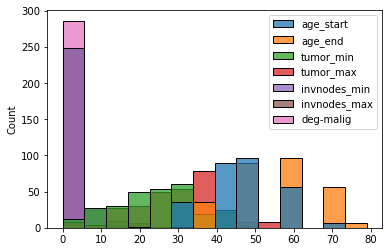

In [357]:
sns.histplot(dats)

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tumor_max', ylabel='Density'>

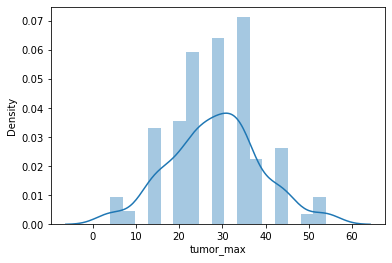

In [358]:
sns.distplot(dats['tumor_max'])

C:\Users\Sankhadip\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tumor_min', ylabel='Density'>

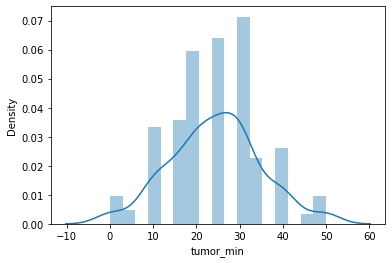

In [359]:
sns.distplot(dats['tumor_min'])

In [360]:
ds_res = pd.get_dummies(dats,columns=categorical,drop_first=True)

In [361]:
ds_res.columns
#ds_res=ds_res[['Class_recurrence-events','age_start', 'age_end', 'tumor_min', 'tumor_max', 'invnodes_min','invnodes_max', 'node-caps', 'deg-malig','menopause_lt40', 'menopause_premeno', 'breast_right','breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low','breast-quad_right_up', 'irradiat_yes']]
ds_res

,age_start,age_end,tumor_min,tumor_max,invnodes_min,invnodes_max,deg-malig,Class_recurrence-events,menopause_lt40,menopause_premeno,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,node-caps_yes,irradiat_yes
0,30,39,30,34,0,2,3,0,0,1,0,1,0,0,0,0,0
1,40,49,20,24,0,2,2,0,0,1,1,0,0,0,1,0,0
2,40,49,20,24,0,2,2,0,0,1,0,1,0,0,0,0,0
3,60,69,15,19,0,2,2,0,0,0,1,0,1,0,0,0,0
4,40,49,0,4,0,2,2,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,30,39,30,34,0,2,2,1,0,1,0,0,1,0,0,0,0
282,30,39,20,24,0,2,3,1,0,1,0,0,1,0,0,0,1
283,60,69,20,24,0,2,1,1,0,0,1,0,1,0,0,0,0
284,40,49,30,34,3,5,3,1,0,0,0,1,0,0,0,0,0


In [362]:
print(ds_res['age_start'].unique())
print(ds_res['age_end'].unique())
print(ds_res['tumor_max'].unique())
print(ds_res['tumor_min'].unique())
print(ds_res['invnodes_min'].unique())
print(ds_res['invnodes_max'].unique())
ds_res.drop(['age_start','tumor_min','invnodes_max'],axis=1,inplace=True)

[30 40 60 50 70 20]
[39 49 69 59 79 29]
[34 24 19  4 29 54 14 44 39  9 49]
[30 20 15  0 25 50 10 40 35  5 45]
[ 0  6  9  3 15 12 24]
[ 2  8 11  5 17 14 26]


In [369]:
ds_res.columns
ds_res=ds_res[['Class_recurrence-events','age_end', 'tumor_max', 'invnodes_min','deg-malig', 'menopause_lt40', 'menopause_premeno','breast_right', 'breast-quad_left_low', 'breast-quad_left_up','breast-quad_right_low', 'breast-quad_right_up', 'node-caps_yes','irradiat_yes']]

<AxesSubplot:xlabel='age_end'>

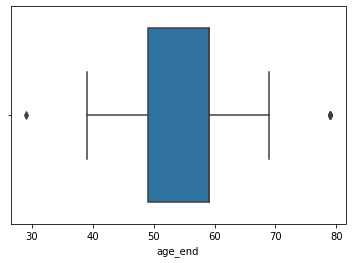

In [370]:
sns.boxplot(data=ds_res,x='age_end')

<AxesSubplot:xlabel='age_end', ylabel='count'>

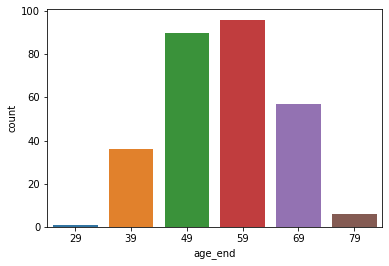

In [371]:
sns.countplot(data=ds_res,x='age_end')

<AxesSubplot:xlabel='irradiat_yes', ylabel='count'>

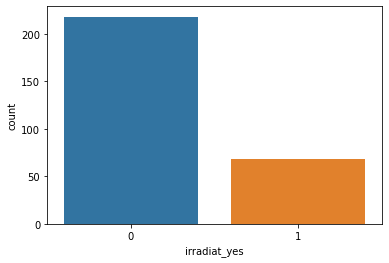

In [372]:
sns.countplot(data=ds_res,x='irradiat_yes')

As the target has a high imbalance feature, we need to smote. 

In [383]:
X=ds_res.iloc[:,:-1]
Y=ds_res.iloc[:,-1]
print("Has value 1->{0}".format((Y==1).sum()))
print("Has value 0->{0}".format((Y==0).sum()))

Has value 1->68
Has value 0->218


In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)

In [389]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
x_test_res,y_test_res = sm.fit_resample(X_test,y_test.ravel())
arrrr=[]
count=0
for i in range(len(y_train_res)):
    if y_train_res[i] ==1:
        arrrr.append(i)
        count+=1
#print(y_pred.shape)
print(count)
count=0
for i in range(len(y_train_res)):
    if y_train_res[i] ==0:
        arrrr.append(i)
        count+=1
print(count)
print(x_train_res.shape, y_train_res.shape)

201
201
(402, 13) (402,)


In [392]:
#Scalling the data for better fit
from sklearn.preprocessing import StandardScaler
X_standard= StandardScaler().fit(x_train_res)
X_train_Std = X_standard.transform(x_train_res)
X_standard= StandardScaler().fit(x_test_res)
X_test_Std = X_standard.transform(x_test_res)

In [393]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_res,y_train_res)  # Random forest doesn't need to have a scaled data. 
y_pred = rf.predict(x_test_res)
count_1=0
arrrr=[]
for i in range(len(y_pred)):
    if y_pred[i] ==1:
        arrrr.append(i)
        count_1+=1
print(y_pred.shape)
print(count_1)
count_0=0
for i in range(len(y_pred)):
    if y_pred[i] ==0:
        arrrr.append(i)
        count_0+=1
print(count_0)

(34,)
9
25


In [394]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_res,y_pred)
cm

array([[14,  3],
       [11,  6]], dtype=int64)

In [395]:
from sklearn import metrics         #Very bad 
metrics.accuracy_score(y_test_res,y_pred)     

0.5882352941176471

In [397]:
from sklearn.model_selection import cross_val_score
scores_RF = cross_val_score(rf , X_train_Std,y_train_res , cv=5 , scoring = 'accuracy')
print(scores_RF.mean())

0.8212654320987655
